In [1]:
import os

img_paths = []
for root, _, files in os.walk('../data/digits'):
    label = root.split('/')[-1]
    for file in files:
        if '.jpg' in file:
            img_paths.append((f'{root}/{file}', label))

In [22]:
import numpy as np
import cv2 as cv

def read_process(path, label):
    img = cv.imread(path, cv.IMREAD_GRAYSCALE)
    img = cv.resize(img, (28, 28))
    return img, label

images = []
labels = []

for path, label in img_paths:
    result = read_process(path, label)
    images.append(result[0])
    labels.append(result[1])
    
images = np.asarray(images)
labels = np.asarray(labels)

9


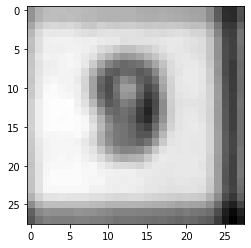

In [23]:
import matplotlib.pyplot as plt

idx = 19

print(labels[idx])
plt.imshow(images[idx], cmap='gray')
plt.show()

In [57]:
y = [int(label) for label in labels]
y = np.asarray(y)

X = []
for image in images:
    image = np.reshape(image, (28, 28, 1))/255.0
    X.append(image)
X = np.asarray(X)

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=76)

In [51]:
from tensorflow_core.python.keras import models, layers

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)               

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(test_acc)

In [ ]:
model.save('../models/digit_rec.h5')

In [54]:
model = models.load_model('../models/digit_rec.h5')

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [82]:
predictions = [np.argmax(i) for i in model.predict(X_test)]

5


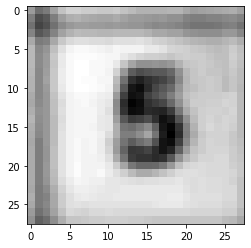

In [88]:
idx = 87

print(predictions[idx])
plt.imshow(np.reshape(X_test[idx], (28, 28)), cmap='gray')
